In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('数据/GDP、GDP增长率、美债.xlsx')
# 定义转换函数
def quarter_to_date(quarter_str):
    year, quarter = quarter_str.split('年')
    quarter_dict = {"第一季度": "03-31", "第二季度": "06-30", "第三季度": "09-30", "第四季度": "12-31"}
    return pd.to_datetime(f"{year}-{quarter_dict[quarter]}")
columns = df.columns
new_columns = [quarter_to_date(col) for col in columns]
df.columns = new_columns
df = df.T
df.columns = ['GDP增长率', 'GDP', '美债']
# print(df.tail(10))
df2 = pd.read_excel('数据/111.xlsx')
df2 = df2.T
df2.columns = ['GDP增长率', '债务占GDP比重', 'GDP']
# df2 = df2.loc['1961':'2021']
# print(df2)
df3 = pd.read_excel('数据/辅助参数数据处理后.xlsx').iloc[:, 1:]
df3 = df3.T
df3.iloc[:, 0] = np.log(df3.iloc[:, 0])
columns3 = ['对数人均GDP', '人口增长率/%', '总储蓄率/%', '私人信贷占GDP百分比/%', '老年抚养比/%']
df3.columns = columns3
# print(df3)

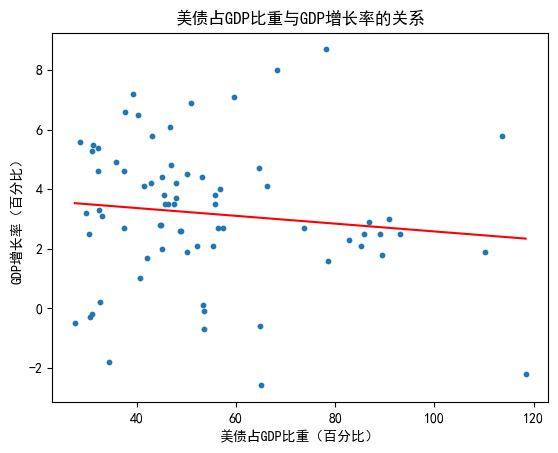

In [62]:
# 假设 df2 是你的 DataFrame
x = df2.iloc[:, 1]  # GDP增长率
y = df2.iloc[:, 0]  # 美债占比
# 绘制散点图
plt.scatter(x, y, s=10)
# 使用 numpy 的 polyfit 方法拟合一条直线
slope, intercept = np.polyfit(x, y, 1)
# 使用拟合得到的斜率和截距，生成趋势线的数据
x_trend = np.linspace(x.min(), x.max(), 100)
y_trend = slope * x_trend + intercept
# 绘制趋势线
plt.plot(x_trend, y_trend, color='red')
plt.title('美债占GDP比重与GDP增长率的关系')
plt.xlabel('美债占GDP比重（百分比）')
plt.ylabel('GDP增长率（百分比）')
# 显示图表
plt.show()